<a href="https://colab.research.google.com/github/tsydenov96/cnn_cats_vs_dogs/blob/main/cnn_02_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Загрузка датасета Dog's-vs-Cat's

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765


In [ ]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/kagglecatsanddogs_5340.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Функция для удаления невалидных изображений
def remove_invalid_images(folder_path):
    img_count = len(os.listdir(folder_path)) - 1
    invalid_images = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath) and os.path.getsize(filepath) == 0:
            invalid_images.append(filename)
            print(f"Invalid image detected: {filename}")
            os.remove(os.path.join(folder_path, filename))

    image_path = os.path.join(folder_path, f"{img_count}.jpg")
    while not os.path.isfile(image_path):
        img_count-= 1
        image_path = os.path.join(folder_path, f"{img_count}.jpg")
    for deleted_name in invalid_images:
        os.rename(image_path, os.path.join(folder_path, deleted_name))



remove_invalid_images('/tmp/PetImages/Cat/')
remove_invalid_images('/tmp/PetImages/Dog/')

# Invalid image detected: 666.jpg
# Invalid image detected: 11702.jpg

Invalid image detected: 666.jpg
Invalid image detected: 11702.jpg


In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
# shutil.rmtree('/tmp/cats-v-dogs')

12500
12500


In [ ]:
# Создание структуры директорий для тренировочных, валидационных и тестовых данных
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/validating')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/validating/cats')
    os.mkdir('/tmp/cats-v-dogs/validating/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
# Разделение данных на тренировочные, валидационные и тестовые выборки для котов и собак
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
VALIDATING_CATS_DIR = "/tmp/cats-v-dogs/validating/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
VALIDATING_DOGS_DIR = "/tmp/cats-v-dogs/validating/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(CAT_SOURCE_DIR, fname)
  dst = os.path.join(TRAINING_CATS_DIR, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(CAT_SOURCE_DIR, fname)
  dst = os.path.join(VALIDATING_CATS_DIR, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(CAT_SOURCE_DIR, fname)
  dst = os.path.join(TESTING_CATS_DIR, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(DOG_SOURCE_DIR, fname)
  dst = os.path.join(TRAINING_DOGS_DIR, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(DOG_SOURCE_DIR, fname)
  dst = os.path.join(VALIDATING_DOGS_DIR, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(DOG_SOURCE_DIR, fname)
  dst = os.path.join(TESTING_DOGS_DIR, fname)
  shutil.copyfile(src, dst)


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/validating/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/validating/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

1000
1000
500
500
500
500


In [ ]:
# Создание модели нейронной сети
model = keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Создание генераторов изображений для тренировочных и валидационных данных
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/validating/"
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=150,
    steps_per_epoch=63,
    validation_data=validation_generator,
    validation_steps=32)

Epoch 1/150
63/63 [==============================] - 17s 250ms/step - loss: 0.6925 - acc: 0.5060 - val_loss: 0.6893 - val_acc: 0.5150
Epoch 2/150
63/63 [==============================] - 17s 276ms/step - loss: 0.6908 - acc: 0.5210 - val_loss: 0.6797 - val_acc: 0.5730
Epoch 3/150
63/63 [==============================] - 16s 250ms/step - loss: 0.6795 - acc: 0.5565 - val_loss: 0.6713 - val_acc: 0.5750
Epoch 4/150
63/63 [==============================] - 16s 249ms/step - loss: 0.6710 - acc: 0.5695 - val_loss: 0.6551 - val_acc: 0.5890
Epoch 5/150
63/63 [==============================] - 16s 253ms/step - loss: 0.6667 - acc: 0.5780 - val_loss: 0.6511 - val_acc: 0.6080
Epoch 6/150
63/63 [==============================] - 16s 253ms/step - loss: 0.6680 - acc: 0.5750 - val_loss: 0.6484 - val_acc: 0.6090
Epoch 7/150
63/63 [==============================] - 16s 252ms/step - loss: 0.6589 - acc: 0.6000 - val_loss: 0.6449 - val_acc: 0.6000
Epoch 8/150
63/63 [==============================] - 16s 251ms

<Figure size 640x480 with 0 Axes>

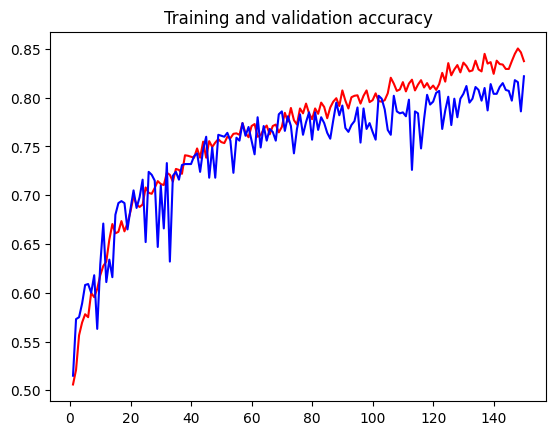

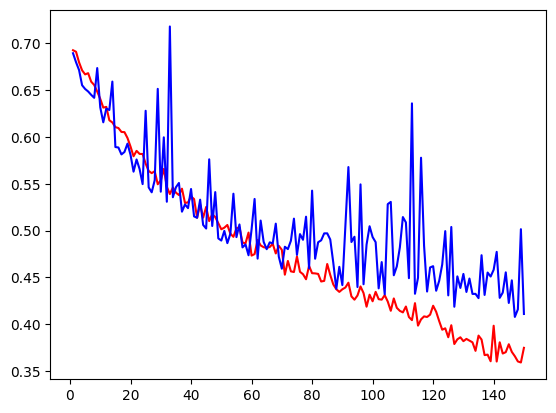

<Figure size 640x480 with 0 Axes>

In [ ]:
# Графики потерь и точности в процессе обучения
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.figure()



In [ ]:
model.save('cnn_catsvsdogs_2000data_aug_03.keras')
copyfile('/content/cnn_catsvsdogs_2000data_aug_03.keras', '/content/drive/MyDrive/Colab Notebooks/cnn_catsvsdogs_2000data_aug_03.keras')


'/content/drive/MyDrive/Colab Notebooks/cnn_catsvsdogs_2000data_aug_03.keras'

In [ ]:
model_1 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cnn_catsvsdogs_2000data_aug_03.keras')

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
test_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))
#
test_loss, test_acc = model_1.evaluate(test_generator, steps=50)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Found 1000 images belonging to 2 classes.
50/50 [==============================] - 6s 35ms/step - loss: 0.4404 - acc: 0.8160
Test loss: 0.44043248891830444
Test accuracy: 0.8159999847412109


1/1 [==============================] - 0s 48ms/step


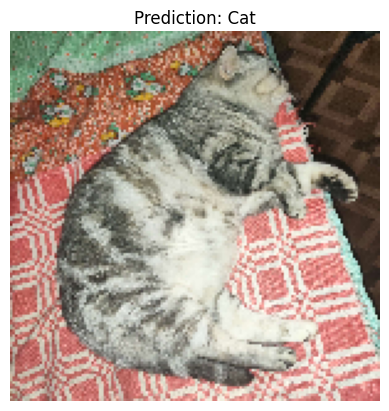

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/image3.jpg'
img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


test_datagen = ImageDataGenerator(rescale=1./255)
test_image_generator = test_datagen.flow(
    img_array,
    batch_size=1)
test_image_predict = model_1.predict(test_image_generator)

predicted_class = "Cat" if test_image_predict[0][0] > 0.5 else "Dog"

# Вывод изображения и метки класса
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()